#Download the Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/Mydrive/project_dataset

[Errno 2] No such file or directory: '/content/drive/Mydrive/project_dataset'
/content


#Image Augmentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False  )

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/project_dataset/flowers", target_size = (64, 64), class_mode = 'categorical', batch_size = 24 )

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/project_dataset/flowers", target_size = (64, 64), class_mode = 'categorical', batch_size = 24 )

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

#Create Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()

#Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [ ]:
#Convolution

In [ ]:
model.add(Convolution2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu')) 

In [ ]:
#Pooling

In [ ]:
model.add(MaxPooling2D(pool_size = (2, 2))) 


In [ ]:
#Flatten

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Dense / Hidden Layers

In [ ]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))

In [ ]:
model.add(Dense(5, activation = 'softmax'))

#Compile The Model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Fit The Model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=5)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 5, factor = 0.5, min_lr = 0.00001)

In [ ]:
callback = [reduce_lr, early_stopping]

In [ ]:
model.fit(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=10,
                    validation_data=x_test,
                    validation_steps=len(x_test))

Epoch 1/10
180/180 [==============================] - 523s 3s/step - loss: 1.5621 - accuracy: 0.3486 - val_loss: 1.4915 - val_accuracy: 0.4107
Epoch 2/10
180/180 [==============================] - 43s 237ms/step - loss: 1.4306 - accuracy: 0.4255 - val_loss: 1.4047 - val_accuracy: 0.4227
Epoch 3/10
180/180 [==============================] - 42s 234ms/step - loss: 1.3581 - accuracy: 0.4573 - val_loss: 1.3427 - val_accuracy: 0.4746
Epoch 4/10
180/180 [==============================] - 43s 239ms/step - loss: 1.2991 - accuracy: 0.5173 - val_loss: 1.2678 - val_accuracy: 0.5256
Epoch 5/10
180/180 [==============================] - 42s 235ms/step - loss: 1.2541 - accuracy: 0.4987 - val_loss: 1.2817 - val_accuracy: 0.4404
Epoch 6/10
180/180 [==============================] - 42s 236ms/step - loss: 1.2301 - accuracy: 0.4846 - val_loss: 1.1860 - val_accuracy: 0.4941
Epoch 7/10
180/180 [==============================] - 42s 236ms/step - loss: 1.1886 - accuracy: 0.4959 - val_loss: 1.1649 - val_accu

In [ ]:
ls

drive/  sample_data/


#Save The Model

In [ ]:
model.save('flowers.h5')

In [ ]:
ls

drive/  flowers.h5  sample_data/


#Test The Model

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('flowers.h5')

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/project_dataset/flowers/dandelion/2444241718_3ca53ce921.jpg')

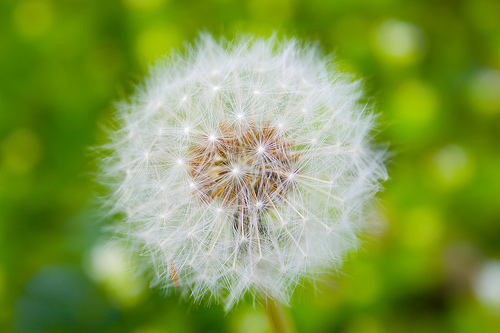

In [ ]:
img

In [ ]:
img1 = image.load_img(r'/content/drive/MyDrive/project_dataset/flowers/tulip/2336919121_851ebc4754.jpg', target_size=(64, 64))

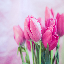

In [ ]:
img1

In [ ]:
x = image.img_to_array(img1)

In [ ]:
x

array([[[218., 216., 240.],
        [218., 212., 238.],
        [219., 211., 234.],
        ...,
        [221., 207., 224.],
        [219., 202., 218.],
        [218., 204., 219.]],

       [[219., 219., 243.],
        [221., 219., 241.],
        [221., 217., 240.],
        ...,
        [223., 211., 225.],
        [224., 206., 220.],
        [221., 204., 220.]],

       [[221., 219., 241.],
        [220., 221., 242.],
        [221., 222., 243.],
        ...,
        [222., 209., 227.],
        [222., 208., 223.],
        [219., 203., 216.]],

       ...,

       [[198., 152., 198.],
        [199., 151., 193.],
        [201., 155., 192.],
        ...,
        [184., 186., 173.],
        [176., 185., 166.],
        [171., 183., 159.]],

       [[197., 145., 191.],
        [199., 150., 195.],
        [198., 149., 194.],
        ...,
        [184., 182., 170.],
        [177., 182., 162.],
        [168., 178., 154.]],

       [[198., 142., 189.],
        [201., 144., 187.],
        [196., 1

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x = np.expand_dims(x, axis=0)
x

array([[[[218., 216., 240.],
         [218., 212., 238.],
         [219., 211., 234.],
         ...,
         [221., 207., 224.],
         [219., 202., 218.],
         [218., 204., 219.]],

        [[219., 219., 243.],
         [221., 219., 241.],
         [221., 217., 240.],
         ...,
         [223., 211., 225.],
         [224., 206., 220.],
         [221., 204., 220.]],

        [[221., 219., 241.],
         [220., 221., 242.],
         [221., 222., 243.],
         ...,
         [222., 209., 227.],
         [222., 208., 223.],
         [219., 203., 216.]],

        ...,

        [[198., 152., 198.],
         [199., 151., 193.],
         [201., 155., 192.],
         ...,
         [184., 186., 173.],
         [176., 185., 166.],
         [171., 183., 159.]],

        [[197., 145., 191.],
         [199., 150., 195.],
         [198., 149., 194.],
         ...,
         [184., 182., 170.],
         [177., 182., 162.],
         [168., 178., 154.]],

        [[198., 142., 189.],
       

In [ ]:
y = np.argmax(model.predict(x))
y

1/1 [==============================] - 0s 17ms/step


4

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
index[y]


'tulip'